#### Importamos los paquetes y librerias

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from time import time
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid
from sklearn import preprocessing, svm, metrics, tree, decomposition
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,auc, roc_curve, f1_score 

## Magicloop

In [2]:
def define_hyper_params():
    clfs = {
        'LR': LogisticRegression(penalty='l2', C=1e5, solver='liblinear'), #Regresión Lógistica
        'PT': SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None),#Perceptron
        'SVM': svm.SVC(kernel='linear', probability=True, random_state=0), #Maquina de Vectores de Soporte
        'NN': MLPClassifier(alpha=1e-5,hidden_layer_sizes = (15,)), #Red Neuronal
        'KNN': KNeighborsClassifier(n_neighbors=3), #K vecinos cercanos
        'DT': DecisionTreeClassifier(), #arboles de decisión
        'RF': RandomForestClassifier(n_estimators=100), #bosques aleatorios
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=10) #Gradient Boosting
            }

    grid = {
        'LR': { 'penalty': ['l1','l2'], 'C': [0.00001,0.0001,0.001,0.01,0.1,1,10]},#Regresión Lógistica
        'PT': { 'loss': ['perceptron'], 'penalty': [None]},#Perceptron
        'SVM': {'C' :[0.001,0.01,0.1,1,10],'kernel':['linear', 'rbf']}, #Maquina de Vectores de Soporte
        'NN': {'solver' : ['lbfgs', 'sgd'],'activation' : ['logistic', 'tanh', 'relu'], 'hidden_layer_sizes' : [(100,50),(200,100,50),(20,10)]},#Red Neuronal
        'KNN': {'n_neighbors': [1,5,10,25,50,100],'weights': ['uniform','distance'],'algorithm': ['auto','ball_tree','kd_tree']}, #K vecinos cercanos
        'DT': {'criterion': ['gini', 'entropy'], 'max_depth': [1,5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5]}, #Arbol de desicion
        'RF':{'n_estimators': [10,100,1000], 'max_depth': [5,10,20,50,100], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5,10]}, #bosques aleatorios
        'GB': {'n_estimators': [10,100,1000], 'learning_rate' : [0.001,0.01,0.05,0.1,0.5],'subsample' : [0.1,0.5,1.0], 'max_depth': [5,10,20,50,100]}
            }

    return clfs, grid

In [3]:
def magic_loop(models_to_run, clfs, grid, X, y, search = 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scaler = StandardScaler()
    scaler.fit(X_train) 
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    for index, clf in enumerate([clfs[x] for x in models_to_run]):
        print(models_to_run[index])
        parameter_values = grid[models_to_run[index]]
        try:
            if(search):
                start = time()
                gs = GridSearchCV(clf, parameter_values, cv=5)
                gs.fit(X_train, y_train)
                y_model = gs.predict(X_test)
                print("Accuracy: {}".format(accuracy_score(y_test, y_model)))
                print("Best parameters: ")
                print(gs.best_params_)
                print("Matriz de Confusion")
                mat = confusion_matrix(y_test, y_model)
                plt.figure()
                sns.heatmap(mat, square = True, annot = True, cbar = False)
                plt.xlabel('Valor predicho')
                plt.ylabel('Valor real')
                plt.show()
                print("Reporte de clasificacion")
                print(classification_report(y_test, y_model,target_names=["Diabetes negativo", "Diavetes Positivo"]))
                fpr, tpr, thresholds = roc_curve(y_test,y_model)
                plt.plot(fpr, tpr, label="ROC Curve")
                plt.xlabel("FPR")
                plt.ylabel("TPR (recall)")
                close_zero = np.argmin(np.abs(thresholds))
                plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
                label="threshold zero", fillstyle="none", c='k', mew=2)
                plt.legend(loc=4)
                print("GridSearch time: " + (str)(time() - start))
                
            else:
                start = time()
                rs = RandomizedSearchCV(clf, parameter_values, cv=5)
                rs.fit(X_train, y_train)
                y_model = rs.predict(X_test)
                print("Accuracy: {}".format(accuracy_score(y_test, y_model)))
                print("Best parameters: ")
                print(rs.best_params_)
                print("Matriz de Confusion")
                mat = confusion_matrix(y_test, y_model)
                plt.figure()
                sns.heatmap(mat, square = True, annot = True, cbar = False)
                plt.xlabel('Valor predicho')
                plt.ylabel('Valor real')
                plt.show()
                print("Reporte de clasificacion")
                print(classification_report(y_test, y_model,target_names=["Diabetes negativo", "Diavetes Positivo"]))
                fpr, tpr, thresholds = roc_curve(y_test,y_model)
                plt.plot(fpr, tpr, label="ROC Curve")
                plt.xlabel("FPR")
                plt.ylabel("TPR")
                close_zero = np.argmin(np.abs(thresholds))
                plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
                label="threshold zero", fillstyle="none", c='k', mew=2)
                plt.legend(loc=4)
                print("RandomizedSearch time: " + (str)(time() - start))
        except IndexError as e:
            print('Error:', e)
            continue

### Importamos los datos

In [4]:
diabetes = pd.read_csv("diabetes.csv")

#### Parameters

In [5]:
clfs, grid = define_hyper_params()
models = ['LR','PT','SVM','NN','KNN','DT','RF','GB']
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[features]
y = diabetes['Outcome'].astype(int)

#### Magic Lopp with GridSearch

LR
Accuracy: 0.8072916666666666
Best parameters: 
{'C': 10, 'penalty': 'l1'}
Matriz de Confusion


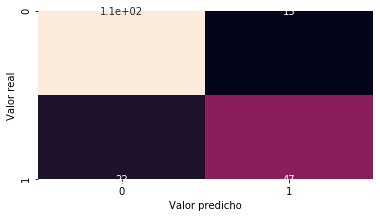

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.83      0.88      0.85       123
Diavetes Positivo       0.76      0.68      0.72        69

         accuracy                           0.81       192
        macro avg       0.79      0.78      0.79       192
     weighted avg       0.80      0.81      0.80       192

GridSearch time: 0.20457124710083008
PT
Accuracy: 0.7552083333333334
Best parameters: 
{'loss': 'perceptron', 'penalty': None}
Matriz de Confusion


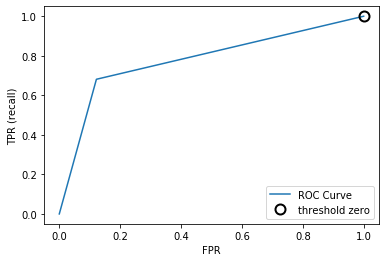

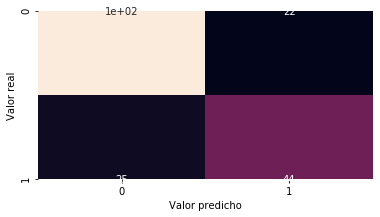

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.80      0.82      0.81       123
Diavetes Positivo       0.67      0.64      0.65        69

         accuracy                           0.76       192
        macro avg       0.73      0.73      0.73       192
     weighted avg       0.75      0.76      0.75       192

GridSearch time: 0.1869359016418457
SVM
Accuracy: 0.8020833333333334
Best parameters: 
{'C': 1, 'kernel': 'linear'}
Matriz de Confusion


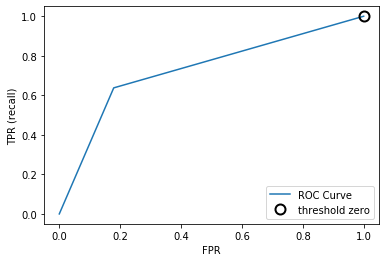

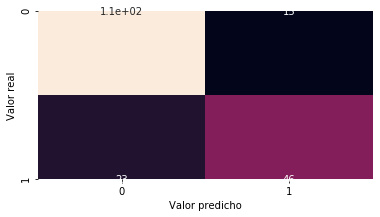

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.82      0.88      0.85       123
Diavetes Positivo       0.75      0.67      0.71        69

         accuracy                           0.80       192
        macro avg       0.79      0.77      0.78       192
     weighted avg       0.80      0.80      0.80       192

GridSearch time: 1.4872722625732422
NN
Accuracy: 0.7916666666666666
Best parameters: 
{'activation': 'tanh', 'hidden_layer_sizes': (200, 100, 50), 'solver': 'sgd'}
Matriz de Confusion


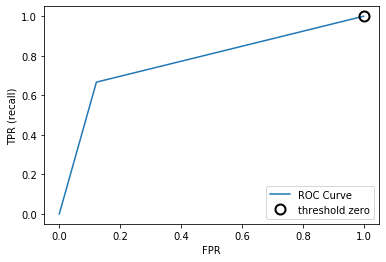

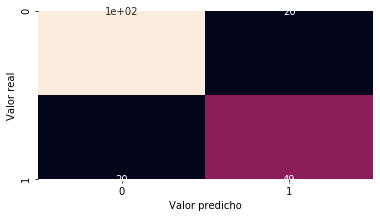

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.84      0.84      0.84       123
Diavetes Positivo       0.71      0.71      0.71        69

         accuracy                           0.79       192
        macro avg       0.77      0.77      0.77       192
     weighted avg       0.79      0.79      0.79       192

GridSearch time: 34.318665742874146
KNN
Accuracy: 0.75
Best parameters: 
{'algorithm': 'auto', 'n_neighbors': 50, 'weights': 'distance'}
Matriz de Confusion


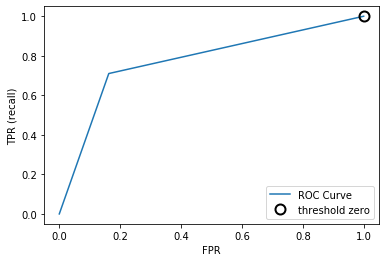

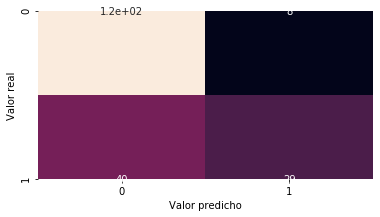

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.74      0.93      0.83       123
Diavetes Positivo       0.78      0.42      0.55        69

         accuracy                           0.75       192
        macro avg       0.76      0.68      0.69       192
     weighted avg       0.76      0.75      0.73       192

GridSearch time: 0.8482275009155273
DT
Accuracy: 0.7552083333333334
Best parameters: 
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2}
Matriz de Confusion


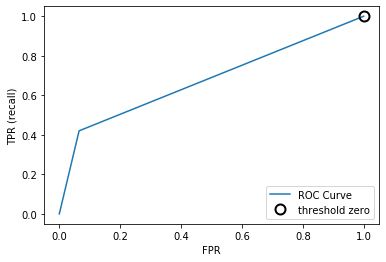

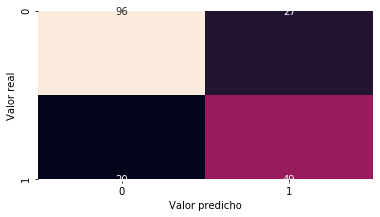

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.83      0.78      0.80       123
Diavetes Positivo       0.64      0.71      0.68        69

         accuracy                           0.76       192
        macro avg       0.74      0.75      0.74       192
     weighted avg       0.76      0.76      0.76       192

GridSearch time: 0.5151708126068115
RF
Accuracy: 0.7604166666666666
Best parameters: 
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Matriz de Confusion


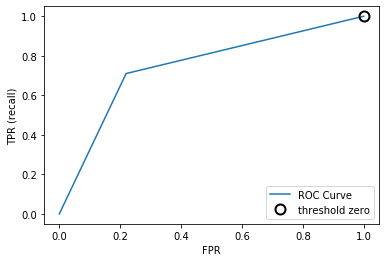

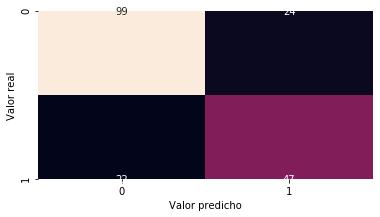

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.82      0.80      0.81       123
Diavetes Positivo       0.66      0.68      0.67        69

         accuracy                           0.76       192
        macro avg       0.74      0.74      0.74       192
     weighted avg       0.76      0.76      0.76       192

GridSearch time: 147.9226212501526
GB
Accuracy: 0.765625
Best parameters: 
{'learning_rate': 0.01, 'max_depth': 100, 'n_estimators': 100, 'subsample': 0.1}
Matriz de Confusion


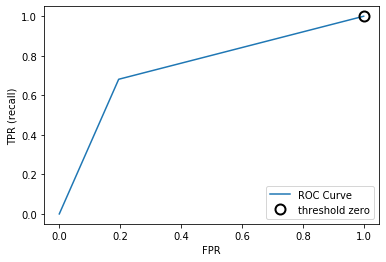

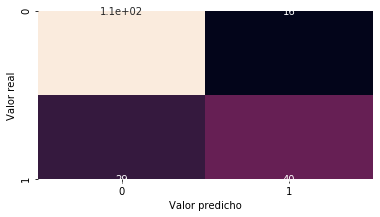

Reporte de clasificacion
                   precision    recall  f1-score   support

Diabetes negativo       0.79      0.87      0.83       123
Diavetes Positivo       0.71      0.58      0.64        69

         accuracy                           0.77       192
        macro avg       0.75      0.72      0.73       192
     weighted avg       0.76      0.77      0.76       192

GridSearch time: 682.2786898612976


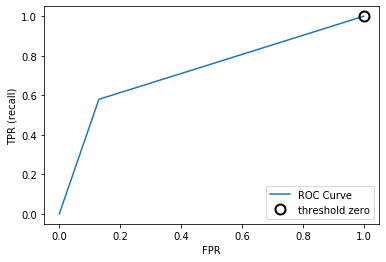

In [6]:
# GridSearch
magic_loop(models, clfs, grid, X, y, search = 1)

#RandomSearch
#magic_loop(models, clfs, grid, X, y, search = 0)